In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.core import _read_segy

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import pandas as pd


D:\Anaconda3\envs\tensorflow\lib\site-packages\pkg_resources\__init__.py:119: PkgResourcesDeprecationWarning: 3712020b6cb16bc5b932c8b782461bf77c8fea80- is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


In [2]:

# 读取Excel文件中的所有工作表
excel_file_path = 'Lithology classification.xlsx'
all_sheets = pd.read_excel(excel_file_path, sheet_name=None)
DATA1=[]
columns_to_extract = ['File','Depth', 'NR','GG','GR','label']

for sheet_name, df in all_sheets.items():
    print(f"Sheet name: {sheet_name}")
    extracted_df = df[columns_to_extract]

Data_all=extracted_df.to_numpy()
Label_all=Data_all[:,-1]
Data_all=Data_all[:,:-1]
Label_all[Label_all==1]=0
Label_all[Label_all==3]=0
Label_all[Label_all==6]=0
Label_all[Label_all==7]=0
Label_all[Label_all==8]=0
Label_all[Label_all==9]=0
Label_all[Label_all==5]=1
Label_all[Label_all==4]=3

Sheet name: Sheet1


(3014,)

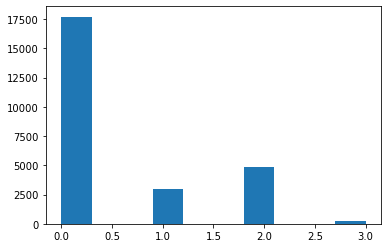

In [3]:
plt.hist(Label_all)
Label_all[Label_all==1].shape

In [4]:


#def normalization_one(data, axis,colinde):
def normalization_one(data, colinde):
    standardized_data=np.copy(data)
    for i in colinde:
        tem=data[:,i]
        minval = np.min(tem)
        maxval = np.max(tem)
        epsilon = 1e-8
        standardized_data[:,i] = (tem - minval) / (maxval - minval + epsilon)
    # 计算均值和标准差
#     minval = np.min(data, axis=axis, keepdims=True)
#     maxval = np.max(data, axis=axis, keepdims=True)
#     #std = np.std(data, axis=axis, keepdims=True)
#     # 防止除以0
#     #std[std == 0] = 1
#     # 标准化
#     epsilon = 1e-8
#     standardized_data = (data - minval) / (maxval - minval + epsilon)

    return standardized_data  


def normalization_(data, axis):
    # 计算均值和标准差
    minval = np.min(data, axis=axis, keepdims=True)
    maxval = np.max(data, axis=axis, keepdims=True)
    # 防止除以0
    #std[std == 0] = 1
    # 标准化
    epsilon = 1e-8
    standardized_data = (data - minval) / (maxval-minval+epsilon)
    return standardized_data  

In [5]:

DATA1=np.load('DATA_lianghe_mulclas.npy',allow_pickle=True)
print(np.unique(DATA1[:,0]))
addfile=[101.,102.,103.,1701.,1702.,1703.,2501.,3301.,3302.]
mask0= np.array([], dtype=int)
for i in range(len(addfile)):
    mask = np.where(DATA1[:, 0] == addfile[i])[0]
    print(addfile[i],len(mask))
    mask0=np.append(mask0,mask)
print(mask0.shape)

#Data_all=np.load('lianghe/Data_all_3curve.npy')
#Data_all=np.load('../../2.28/data_all/Data_all_3curve.npy')

Label_all_=DATA1[mask0,-1]
Data_all_=DATA1[mask0,:-1]
#Label_all_[Label_all_==3]=0
# pick1=np.where(Label_all_==1)[0]
# Label_all_=Label_all_[pick1]
# Data_all_=Data_all_[pick1]

Data_all= np.concatenate((Data_all,Data_all_), axis=0)
Label_all= np.concatenate((Label_all,Label_all_), axis=0)
#Label_all[Label_all==3]=0
# Data_all[:,2]=np.log10(Data_all[:,2]+0.01)
# Data_all[:,3]=np.log10(Data_all[:,3]+0.01)
# Data_all[:,4]=np.log10(Data_all[:,4]+0.01)

[  101.   102.   103.  1701.  1702.  1703.  2501.  3301.  3302.]
101.0 4101
102.0 4301
103.0 4901
1701.0 6776
1702.0 4255
1703.0 4201
2501.0 5201
3301.0 5101
3302.0 6105
(44942,)


(array([  5.49280000e+04,   1.41680000e+04,   1.20700000e+03,
          2.72000000e+02,   9.40000000e+01,   3.50000000e+01,
          1.20000000e+01,   1.10000000e+01,   3.00000000e+00,
          2.60000000e+01]),
 array([    0. ,   105.8,   211.6,   317.4,   423.2,   529. ,   634.8,
          740.6,   846.4,   952.2,  1058. ]),
 <BarContainer object of 10 artists>)

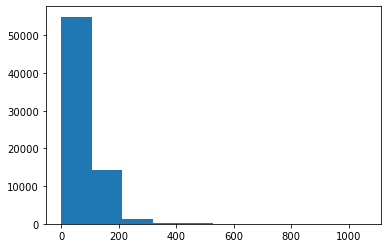

In [6]:
plt.hist(Data_all[:,4])

((70756, 5), (70756,), (4543,))

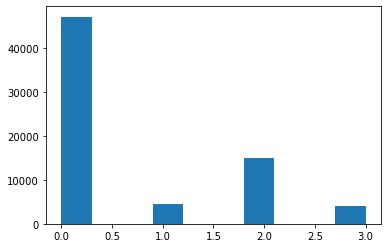

In [7]:
plt.hist(Label_all)

Data_all.shape,Label_all.shape,Label_all[Label_all==1].shape

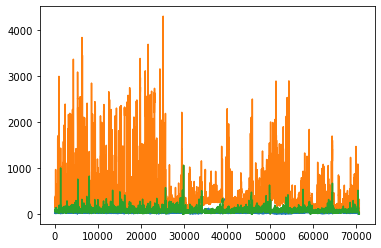

In [8]:

plt.plot(Data_all[:,2])
plt.plot(Data_all[:,3])
plt.plot(Data_all[:,4])
plt.show()

In [6]:
def cutdata(data1,label1):
    data0=[]
    label0=[]
    for i in range(20,len(data1)-20):
        tem=data1[i-20:i+20,:]
        data0.append(tem)
        label0.append(label1[i])
    return np.array(data0),np.array(label0)

fnameunique=np.unique(Data_all[:,0])
print(fnameunique)

DATA0=[]
LABEL0=[]
for i in range(len(fnameunique)):
    print(i,fnameunique[i])
    indexpick=np.where(Data_all[:,0]==fnameunique[i])[0]
    data0=Data_all[indexpick,:]
    label0=Label_all[indexpick]
#     plt.plot(data0[:,2])
#     plt.plot(data0[:,3])
#     plt.plot(data0[:,4])
#     plt.show()
    data1_tem=normalization_one(data0,colinde=[2,3,4])
    data1_tem,label1=cutdata(data1_tem,label0)

    data1,label1=cutdata(data0,label0)
    data1=normalization_(data1,axis=1)
    
    data1=np.concatenate((data1,data1_tem[:,:,2:]), axis=2)
    print(data1.shape,label1.shape)
    DATA0.append(data1[:,:,2:])
    LABEL0.append(label1)

DATA0=np.concatenate(DATA0, axis=0)
LABEL0=np.concatenate(LABEL0, axis=0)

print(DATA0.shape,LABEL0.shape)

LABEL0_onehot = to_categorical(LABEL0, num_classes=4)


[  101.   102.   103.  1701.  1702.  1703.  2501.  3101.  3102.  3301.
  3302.  3401.  3501.  3502.  3601.  3701.  3702.  3801.  3802.  3901.
  4001.  4002.]
0 101.0
(4061, 40, 8) (4061,)
1 102.0
(4261, 40, 8) (4261,)
2 103.0
(4861, 40, 8) (4861,)
3 1701.0
(6736, 40, 8) (6736,)
4 1702.0
(4215, 40, 8) (4215,)
5 1703.0
(4161, 40, 8) (4161,)
6 2501.0
(5161, 40, 8) (5161,)
7 3101.0
(1401, 40, 8) (1401,)
8 3102.0
(1161, 40, 8) (1161,)
9 3301.0
(7782, 40, 8) (7782,)
10 3302.0
(6065, 40, 8) (6065,)
11 3401.0
(1361, 40, 8) (1361,)
12 3501.0
(1261, 40, 8) (1261,)
13 3502.0
(2001, 40, 8) (2001,)
14 3601.0
(1921, 40, 8) (1921,)
15 3701.0
(1341, 40, 8) (1341,)
16 3702.0
(2801, 40, 8) (2801,)
17 3801.0
(2081, 40, 8) (2081,)
18 3802.0
(2001, 40, 8) (2001,)
19 3901.0
(1701, 40, 8) (1701,)
20 4001.0
(1541, 40, 8) (1541,)
21 4002.0
(2001, 40, 8) (2001,)
(69876, 40, 6) (69876,)


In [12]:


# fnameunique=np.unique(Data_all_[:,0])
# print(fnameunique)

# DATA1=[]
# LABEL1=[]
# for i in range(len(fnameunique)):
#     indexpick=np.where(Data_all_[:,0]==fnameunique[i])[0]
#     data0=Data_all_[indexpick,:]
#     label0=Label_all_[indexpick]
# #     plt.plot(data0[:,2])
# #     plt.plot(data0[:,3])
# #     plt.plot(data0[:,4])
# #     plt.show()
#     data1_tem=normalization_one(data0,colinde=[2,3,4])
#     data1_tem,label1=cutdata(data1_tem,label0)

#     data1,label1=cutdata(data0,label0)
#     data1=normalization_(data1,axis=1)
    
#     data1=np.concatenate((data1,data1_tem[:,:,2:]), axis=2)
#     print(data1.shape,label1.shape)
#     DATA1.append(data1[:,:,2:])
#     LABEL1.append(label1)

# DATA1=np.concatenate(DATA1, axis=0)
# LABEL1=np.concatenate(LABEL1, axis=0)

# print(DATA1.shape,LABEL1.shape)

# LABEL1_onehot = to_categorical(LABEL1, num_classes=4)


(150.0, 488.75)

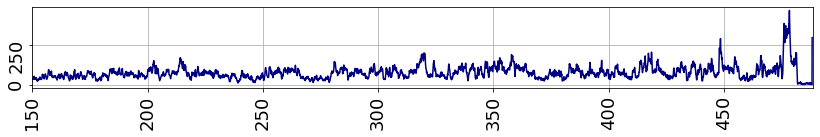

In [54]:
DATA1=np.load('DATA_lianghe_mulclas.npy')

pickindex=np.where(DATA1[:,0]==1701)    
data1=DATA1[pickindex]

fig, ax1 = plt.subplots(figsize=(14, 1.5))
plt.grid()
# 绘制第一条曲线
plt.rcParams.update({'font.size': 18}) 
#ax1.plot(data1[:,1], data1[:,2], 'black')
#ax1.plot(data1[:,1], data1[:,3], 'darkred')
ax1.plot(data1[:,1], data1[:,4], 'navy')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.xlim(np.min(data1[:,1]),np.max(data1[:,1]))
#plt.ylim(-1,600)

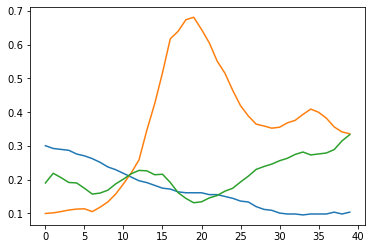

In [8]:
plt.plot(DATA0[pickindex[K],:,3])
plt.plot(DATA0[pickindex[K],:,4])
plt.plot(DATA0[pickindex[K],:,5])


In [14]:
X_train_flat.shape

(69876, 240)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train_flat = DATA0.reshape(DATA0.shape[0], -1)


# 创建并训练随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat[18000:], LABEL0_onehot[18000:])





RandomForestClassifier(random_state=42)

In [15]:
from joblib import dump, load
y_pred = rf_model.predict(X_train_flat)
dump(rf_model, 'random_forest_model_coalclas.joblib')

accuracy_train = accuracy_score(LABEL0_onehot[18000:], y_pred[18000:])
accuracy= accuracy_score(LABEL0_onehot[:18000], y_pred[:18000])

print(accuracy,accuracy_train)

0.684222222222 1.0


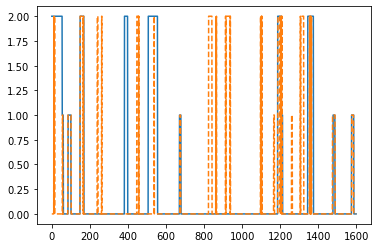

In [18]:
predi=rf_model.predict(DATA0[6400:8000].reshape(DATA0[6400:8000].shape[0], -1))
predi = np.argmax(predi,axis=1)


plt.plot(LABEL0[6400:8000])
plt.plot(predi,linestyle='--')


In [250]:
np.where(LABEL0==2)[0]

array([ 72216,  72217,  72218, ..., 112385, 112386, 112387], dtype=int64)

In [22]:
model.save_weights('model/CNN7.26_.ckpt')
model.save('model/CNN7.26_.h5')



In [55]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump, load

Acc=[]
X_train_flat = DATA0.reshape(DATA0.shape[0], -1)
# # 训练模型
for i in range(10,150,10):
    for j in range(10,80,5):
        # 创建并训练随机森林模型
        rf_model = RandomForestClassifier(n_estimators=10+i, random_state=10+j)
        rf_model.fit(X_train_flat[18000:], LABEL0_onehot[18000:])
        
        y_pred = rf_model.predict(X_train_flat)

        accuracy_train = accuracy_score(LABEL0_onehot[18000:], y_pred[18000:])
        accuracy= accuracy_score(LABEL0_onehot[:18000], y_pred[:18000])
            
        Acc.append([i,j,accuracy_train,accuracy])
Acc=np.array(Acc)

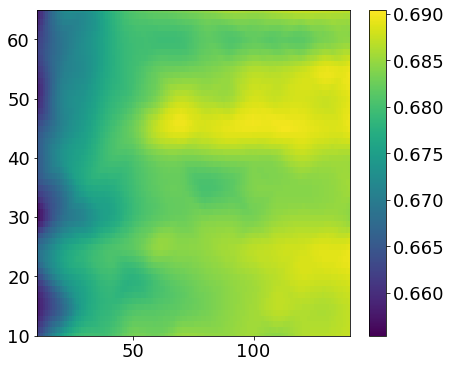

In [87]:
from scipy.interpolate import griddata
X1=np.arange(10,150,1)
Y1=np.arange(10,80,1)
X_grid, Y_grid = np.meshgrid(X1, Y1)
X=X_grid.flatten()
Y=Y_grid.flatten()
mesh1 = np.column_stack((X, Y))

#print(self.xg[[0,2]].shape, self.slipv.shape)
Acc_grid=griddata(Acc[:,[0,1]], Acc[:,3], mesh1, method='cubic')
Acc_grid=Acc_grid.reshape((Y1.shape[0],X1.shape[0]))

fig = plt.figure(figsize=(7, 6))
plt.rcParams.update({'font.size': 18}) 
plt.pcolor(X1,Y1,Acc_grid)
plt.xlim(10,140)
plt.ylim(10,65)
plt.colorbar()

In [86]:
flat_index = np.argmax(Acc_grid)
max_index = np.unravel_index(flat_index, Acc_grid.shape)
max_index

(0, 131)

In [65]:
X.shape

(100, 100)